# Stock Prediction ML Model

In [66]:
# Install the required libraries
# !pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf

# Define the start and end dates
start = '2010-01-01'
end = '2019-12-31'

# Fetch stock data for AAPL using yfinance
ticker = 'AAPL'  # single ticker or list of tickers
df = yf.download(ticker, start=start, end=end)

# If yfinance returned MultiIndex columns (e.g., when multiple tickers were requested),
# flatten them to a single level so we can index by column names like 'Close'.
if isinstance(df.columns, pd.MultiIndex):
	df.columns = df.columns.get_level_values(0)

# Select specific columns (skip 'Adj Close' if it's not present)
cols = ['High', 'Low', 'Open', 'Close', 'Volume']
if 'Adj Close' in df.columns:
	cols.append('Adj Close')

df = df[cols]

# Display the first few rows
print(df.head())


C:\Users\Asus\AppData\Local\Temp\ipykernel_49896\4006397085.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           High       Low      Open     Close     Volume
Date                                                         
2010-01-04  6.439315  6.375673  6.407194  6.424605  493729600
2010-01-05  6.472038  6.401791  6.442318  6.435714  601904800
2010-01-06  6.461231  6.326740  6.435713  6.333345  552160000
2010-01-07  6.364265  6.275706  6.356760  6.321636  477131200
2010-01-08  6.364265  6.276006  6.313230  6.363664  447610800


In [67]:
print(df.tail())

Price            High        Low       Open      Close     Volume
Date                                                             
2019-12-23  68.650161  67.713088  67.751731  68.589783   98572000
2019-12-24  68.804705  68.328924  68.756399  68.654961   48478800
2019-12-26  70.034020  68.758831  68.787811  70.017113   93121200
2019-12-27  70.997661  69.584807  70.309346  69.990547  146266000
2019-12-30  70.688526  68.884422  69.908436  70.405952  144114400


In [68]:
df = df.reset_index()
print(df.head())

Price       Date      High       Low      Open     Close     Volume
0     2010-01-04  6.439315  6.375673  6.407194  6.424605  493729600
1     2010-01-05  6.472038  6.401791  6.442318  6.435714  601904800
2     2010-01-06  6.461231  6.326740  6.435713  6.333345  552160000
3     2010-01-07  6.364265  6.275706  6.356760  6.321636  477131200
4     2010-01-08  6.364265  6.276006  6.313230  6.363664  447610800


In [69]:
cols_to_drop = [col for col in ['Date', 'Adj Close'] if col in df.columns]
df = df.drop(cols_to_drop, axis=1)
df.head()

Price,High,Low,Open,Close,Volume
0,6.439315,6.375673,6.407194,6.424605,493729600
1,6.472038,6.401791,6.442318,6.435714,601904800
2,6.461231,6.326740,6.435713,6.333345,552160000
3,6.364265,6.275706,6.356760,6.321636,477131200
4,6.364265,6.276006,6.313230,6.363664,447610800


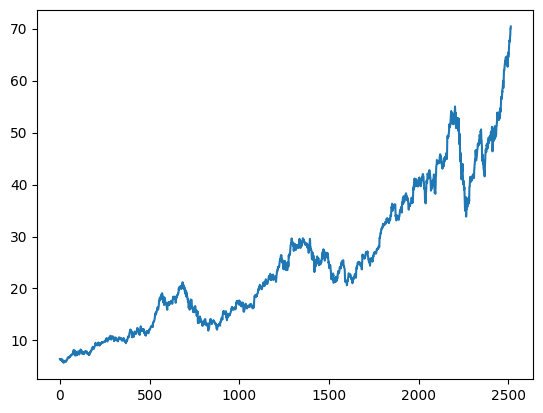

In [70]:
plt.plot(df['Close'])
plt.show()

In [71]:
df

Price,High,Low,Open,Close,Volume
0,6.439315,6.375673,6.407194,6.424605,493729600
1,6.472038,6.401791,6.442318,6.435714,601904800
2,6.461231,6.326740,6.435713,6.333345,552160000
3,6.364265,6.275706,6.356760,6.321636,477131200
4,6.364265,6.276006,6.313230,6.363664,447610800
...,...,...,...,...,...
2510,68.650161,67.713088,67.751731,68.589783,98572000
2511,68.804705,68.328924,68.756399,68.654961,48478800
2512,70.034020,68.758831,68.787811,70.017113,93121200
2513,70.997661,69.584807,70.309346,69.990547,146266000


In [72]:
ma100 = df['Close'].rolling(100).mean()
print(ma100)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    57.073138
2511    57.270286
2512    57.506676
2513    57.734020
2514    57.960624
Name: Close, Length: 2515, dtype: float64


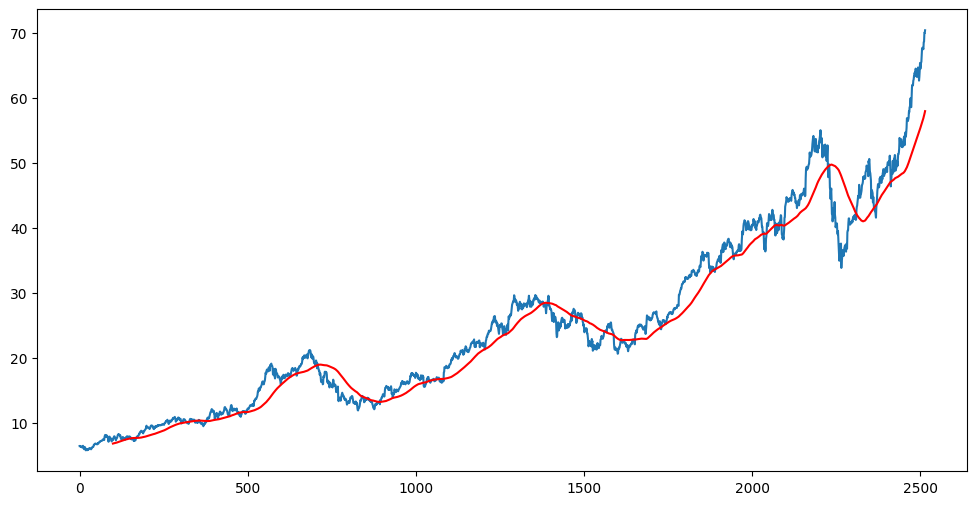

In [73]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [74]:
ma200 = df['Close'].rolling(200).mean()
print(ma200)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    52.037092
2511    52.164217
2512    52.297196
2513    52.427629
2514    52.557284
Name: Close, Length: 2515, dtype: float64


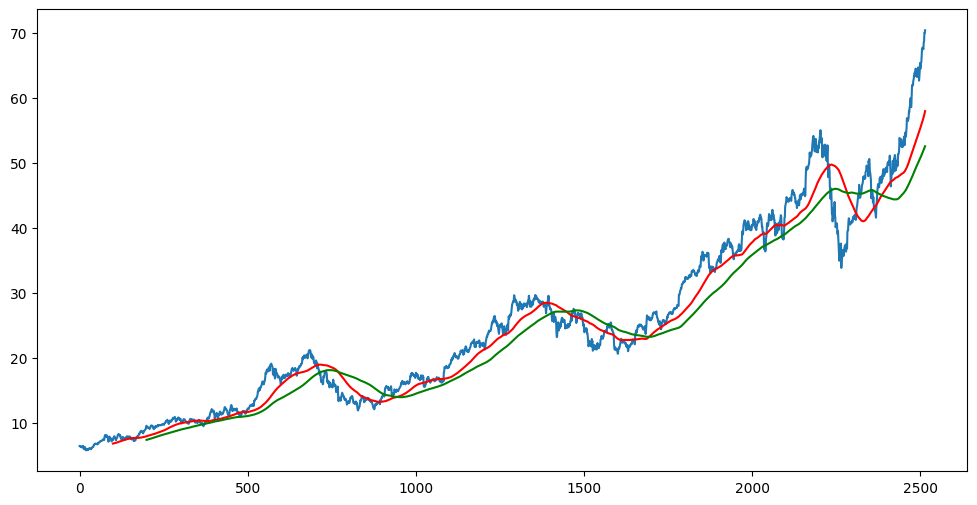

In [75]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [76]:
df.shape

(2515, 5)

In [77]:
df.shape

(2515, 5)

In [78]:
df.shape

(2515, 5)

In [79]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [80]:
data_training.head()

,Close
0,6.424605
1,6.435714
2,6.333345
3,6.321636
4,6.363664


In [81]:
data_testing.head()

,Close
1760,26.930647
1761,26.720701
1762,26.796835
1763,26.766836
1764,26.902962


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760002],
       [0.02806509],
       [0.02377928],
       ...,
       [0.88408379],
       [0.89123149],
       [0.88640218]], shape=(1760, 1))

In [83]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [84]:
#ML Model

In [85]:
# Import necessary libraries from Keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Define the Sequential model
model = Sequential()

# Add LSTM layers with Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(units=1))

# Print model summary
# model.summary()


c:\Users\Asus\OneDrive\Desktop\Stock Prediction ML Model\price_pred_venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0690
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0135
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0130
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0102
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0089
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0089
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.0083
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - loss: 0.0084
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - loss: 0.0084
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 0.0074
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - loss: 0.0071
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.0073
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0072
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0066
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss

In [88]:
model.save('keras_model.h5')

In [89]:
data_testing.head()


,Close
1760,26.930647
1761,26.720701
1762,26.796835
1763,26.766836
1764,26.902962


In [90]:
data_training.tail(100)

,Close
1660,24.874214
1661,24.975203
1662,24.789282
1663,24.773212
1664,24.830597
...,...
1755,27.006783
1756,26.829138
1757,26.882193
1758,27.052919


In [91]:
past_100_days = data_training.tail(100)

In [92]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [93]:
final_df.head()

,Close
0,24.874214
1,24.975203
2,24.789282
3,24.773212
4,24.830597


In [94]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573568],
       [0.02789657],
       [0.02391834],
       [0.02357449],
       [0.02480238],
       [0.03118724],
       [0.03069598],
       [0.02991026],
       [0.02922269],
       [0.03059775],
       [0.02642312],
       [0.02809292],
       [0.02406571],
       [0.02180646],
       [0.01871234],
       [0.01812305],
       [0.01409564],
       [0.01458665],
       [0.0176811 ],
       [0.0225923 ],
       [0.02244501],
       [0.02568646],
       [0.01173807],
       [0.        ],
       [0.01134525],
       [0.02367281],
       [0.04243425],
       [0.06109754],
       [0.05790495],
       [0.05132374],
       [0.05127472],
       [0.0511764 ],
       [0.05643166],
       [0.04705084],
       [0.04788569],
       [0.04891719],
       [0.05314095],
       [0.04444798],
       [0.04872084],
       [0.04611778],
       [0.04847511],
       [0.04872084],
       [0.05284628],
       [0.05368131],
       [0.06345491],
       [0.06468271],
       [0.06979055],
       [0.068

In [95]:
input_data.shape

(855, 1)

In [96]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [97]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [98]:
#Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [99]:
y_predicted.shape

(755, 1)

In [100]:
y_test

array([0.06973815, 0.06524584, 0.06687491, 0.06623301, 0.06914576,
       0.07556343, 0.08089488, 0.08148707, 0.08464661, 0.0821784 ,
       0.0811416 , 0.08588078, 0.08583127, 0.08479468, 0.08588078,
       0.08627572, 0.08573267, 0.09516153, 0.09545771, 0.09550709,
       0.09392744, 0.09254508, 0.1290759 , 0.12798992, 0.13070489,
       0.13667803, 0.14279966, 0.14531713, 0.15002746, 0.14853984,
       0.15434064, 0.16291819, 0.16534768, 0.16455436, 0.16638892,
       0.17124736, 0.17328039, 0.17040458, 0.17104913, 0.17238803,
       0.17268547, 0.18656782, 0.18245246, 0.18651803, 0.18433677,
       0.18522893, 0.18265081, 0.18106435, 0.18334486, 0.18364263,
       0.18260151, 0.18988955, 0.19102993, 0.1875594 , 0.19484753,
       0.18681564, 0.19464926, 0.19217039, 0.19078195, 0.19197204,
       0.20644928, 0.20803574, 0.20709371, 0.20575539, 0.20595325,
       0.21125846, 0.20753995, 0.20575539, 0.20416868, 0.2033255 ,
       0.19569039, 0.19653341, 0.19281507, 0.19668213, 0.19355

In [101]:
y_predicted

array([[0.12487024],
       [0.12556602],
       [0.12628302],
       [0.12700664],
       [0.12772278],
       [0.12842049],
       [0.1290974 ],
       [0.12975729],
       [0.13040751],
       [0.13105823],
       [0.13171771],
       [0.13239056],
       [0.1330815 ],
       [0.13379368],
       [0.13452743],
       [0.13528109],
       [0.13605154],
       [0.13683388],
       [0.13762835],
       [0.13843735],
       [0.13926312],
       [0.1401055 ],
       [0.14096104],
       [0.14184894],
       [0.14279625],
       [0.14383055],
       [0.14497794],
       [0.1462616 ],
       [0.14769828],
       [0.14929835],
       [0.15106063],
       [0.15297551],
       [0.15503433],
       [0.15722711],
       [0.15953973],
       [0.16195473],
       [0.16445401],
       [0.1670191 ],
       [0.16962856],
       [0.17225945],
       [0.17488894],
       [0.17749496],
       [0.18006463],
       [0.18258776],
       [0.1850576 ],
       [0.18746765],
       [0.18981174],
       [0.192

In [102]:
scaler.scale_

array([0.02139748])

In [103]:
scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

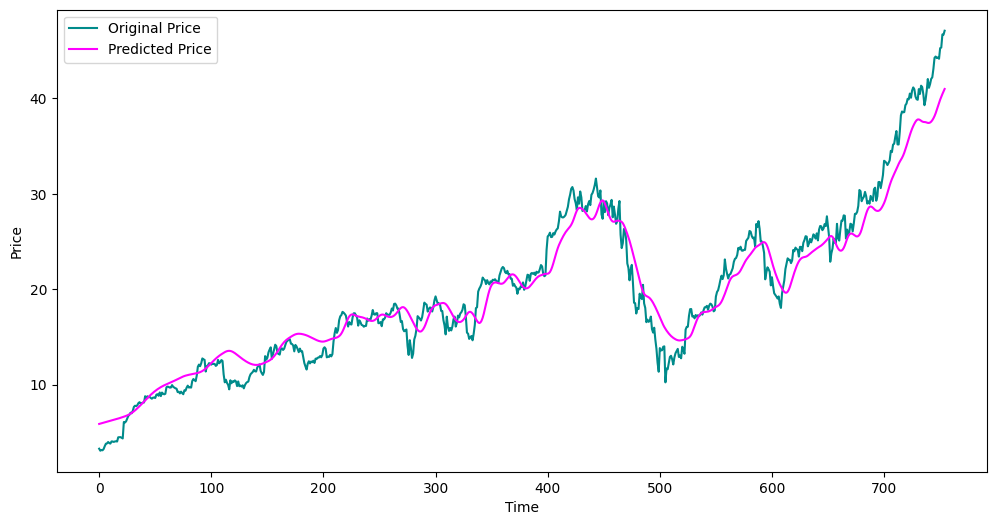

In [104]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='darkcyan', label='Original Price')
plt.plot(y_predicted, color='magenta', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [110]:
from tensorflow import keras
# Save the trained Keras model in the native Keras format.
# Keras requires a .keras (recommended) or .h5 extension.
model.save("my_model_keras.h5")